In [83]:
import itertools
from itertools import combinations, product
import math
import time

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np
import qutip as qt

import ipywidgets as widgets
from IPython.display import display
from matplotlib.animation import FuncAnimation



# 1. Full Hamiltonian Simulation

In [302]:
def generate_triangle_ladder_full_Hamiltonian(annihilation_operators, num_qubits, J_parallel, J_perp, num_levels=2, detuning=None):
    
    
    if detuning is None:
        detuning = 0
        
    if isinstance(detuning, (int, float)):
        detuning = np.array([detuning]*num_qubits)
    
    H = 0
    
    for i in range(num_qubits):
        # qubit i is coupled to qubit i + 1 and qubit i + 2
        a_i = annihilation_operators[i] 
        H += a_i.dag()*a_i * detuning[i]
        
        if i < num_qubits - 1:
            a_j = annihilation_operators[i+1]
            H += J_perp*(a_i.dag()*a_j + a_j.dag()*a_i)
        
        if i < num_qubits - 2:
            a_j = annihilation_operators[i+2]
            H += J_parallel*(a_i.dag()*a_j + a_j.dag()*a_i)
        
    return qt.Qobj(H)
    

In [330]:
num_levels = 3
num_qubits = 2
num_particles = 2

J_parallel = 1 * 2 * np.pi
J_perp = J_parallel


a = qt.destroy(num_levels)

annihilation_operators = []
for i in range(num_qubits):
    left_pad = [qt.qeye(num_levels)] * i
    right_pad = [qt.qeye(num_levels)] * (num_qubits - i - 1)
    a_i = qt.tensor(*left_pad, a, *right_pad)
    annihilation_operators.append(a_i)
    
H = generate_triangle_ladder_full_Hamiltonian(annihilation_operators, num_qubits, J_parallel, J_perp, num_levels=num_levels, detuning=0)

print(H/2/np.pi)

Quantum object: dims=[[3, 3], [3, 3]], shape=(9, 9), type='oper', dtype=Dia, isherm=True
Qobj data =
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         1.41421356 0.
  0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         1.41421356 0.         0.         0.
  1.41421356 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         2.         0.        ]
 [0.         0.         0.         0.         1.41421356 0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         2.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]


In [327]:
j_12_operator = 1j*(annihilation_operators[0].dag()*annihilation_operators[1] - annihilation_operators[1].dag()*annihilation_operators[0])
j_12_operator

Quantum object: dims=[[3, 3, 3], [3, 3, 3]], shape=(27, 27), type='oper', dtype=Dia, isherm=True
Qobj data =
[[ 0.+0.j          0.+0.j          0.+0.j          0.+0.j
   0.+0.j          0.+0.j          0.+0.j          0.+0.j
   0.+0.j          0.+0.j          0.+0.j          0.+0.j
   0.+0.j          0.+0.j          0.+0.j          0.+0.j
   0.+0.j          0.+0.j          0.+0.j          0.+0.j
   0.+0.j          0.+0.j          0.+0.j          0.+0.j
   0.+0.j          0.+0.j          0.+0.j        ]
 [ 0.+0.j          0.+0.j          0.+0.j          0.+0.j
   0.+0.j          0.+0.j          0.+0.j          0.+0.j
   0.+0.j          0.+0.j          0.+0.j          0.+0.j
   0.+0.j          0.+0.j          0.+0.j          0.+0.j
   0.+0.j          0.+0.j          0.+0.j          0.+0.j
   0.+0.j          0.+0.j          0.+0.j          0.+0.j
   0.+0.j          0.+0.j          0.+0.j        ]
 [ 0.+0.j          0.+0.j          0.+0.j          0.+0.j
   0.+0.j          0.+0.j          

In [323]:
j_12_operator_matrix = j_12_operator.data.to_array()

print(j_12_operator_matrix.shape)
all_states_basis = [bits for bits in product((0, 1), repeat=num_qubits)]
for i in range(j_12_operator_matrix.shape[0]):
    for j in range(j_12_operator_matrix.shape[1]):
        if np.round(np.abs(j_12_operator_matrix[i,j])) == 1:
            print(f'row: {i}')
            print(all_states_basis[i])
            print(f'column: {j}')
            print(all_states_basis[j])
            print()
            
    

(16, 16)
row: 4
(0, 1, 0, 0)
column: 8
(1, 0, 0, 0)

row: 5
(0, 1, 0, 1)
column: 9
(1, 0, 0, 1)

row: 6
(0, 1, 1, 0)
column: 10
(1, 0, 1, 0)

row: 7
(0, 1, 1, 1)
column: 11
(1, 0, 1, 1)

row: 8
(1, 0, 0, 0)
column: 4
(0, 1, 0, 0)

row: 9
(1, 0, 0, 1)
column: 5
(0, 1, 0, 1)

row: 10
(1, 0, 1, 0)
column: 6
(0, 1, 1, 0)

row: 11
(1, 0, 1, 1)
column: 7
(0, 1, 1, 1)



In [4]:
eigenenergies, eigenstates = H.eigenstates()
# this fails

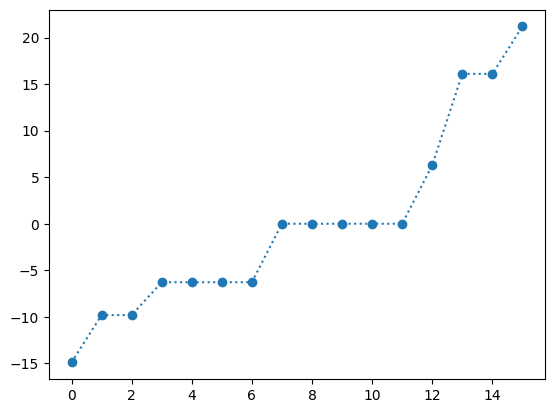

In [5]:
plt.plot(eigenenergies, linestyle=':', marker='o')

In [6]:
number_operators = [a_i.dag()*a_i for a_i in annihilation_operators]
total_number_operator = sum(number_operators)

print(generate_basis(num_qubits, num_particles))


min_energy = np.inf
min_energy_state = None
for i in range(len(eigenstates)):
    number = int(qt.expect(total_number_operator, eigenstates[i]))
    if number == num_particles:
        print(f'eigenstate with particle number {num_particles}')
        print(eigenstates[i])
        energy = qt.expect(H, eigenstates[i])
        if energy < min_energy:
            min_energy = energy
            min_energy_state = eigenstates[i]

print('min energy')
print(min_energy)
print(min_energy_state)

max_energy = -np.inf
max_energy_state = None
for i in range(len(eigenstates)):
    number = int(qt.expect(total_number_operator, eigenstates[i]))
    if number == num_particles:
        energy = qt.expect(H, eigenstates[i])
        if energy > max_energy:
            max_energy = energy
            max_energy_state = eigenstates[i]
            
print(max_energy)
print(max_energy_state)

NameError: name 'generate_basis' is not defined

In [ ]:
psi0 = min_energy_state
psi0 = max_energy_state
# psi0 = qt.basis([num_levels]*num_qubits, [1, 1, 0, 0])

print(min_energy_state.norm())
print(psi0)

times = np.linspace(0, 1, 1001)

e_ops = [a_i.dag()*a_i for a_i in annihilation_operators]


In [ ]:
result = qt.sesolve(H, psi0, times, e_ops=e_ops)

In [ ]:
for i in range(len(result.expect)):
    plt.plot(times, result.expect[i], label=f'Q{i+1}')
    
plt.xlabel('time ($\mu$s)')
plt.ylabel('Populations')
plt.legend()
plt.ylim(0, 1)

plt.show()


In [ ]:
detuning = [1000*2*np.pi]*8
detuning[0] = 0
detuning[1] = 0

H_detuned = generate_triangle_ladder_full_Hamiltonian(annihilation_operators, num_qubits, J_parallel, J_parallel, num_levels=num_levels, detuning=detuning)

print(H_detuned/2/np.pi)

In [ ]:
### first evolve to get state at time t

times = np.linspace(0, 1, 1001)

psi0 = min_energy_state
print(psi0)



In [ ]:
result = qt.sesolve(H_detuned, psi0, times, e_ops)

In [ ]:
for i in range(len(result.expect)):
    plt.plot(times, result.expect[i], label=f'Q{i+1}')
    
plt.xlabel('time ($\mu$s)')
plt.ylabel('Populations')
plt.legend()
plt.show()

# 2. Single Particle Number Manifold Hamiltonian Simulation

In [ ]:
def generate_triangle_ladder_Hamiltonian(num_qubits, J_parallel, J_perp, detuning=None):
    
    if detuning is None:
        detuning = 0
        
    if isinstance(detuning, (int, float)):
        detuning = np.array([detuning]*num_qubits)
    
    H = np.zeros((num_qubits, num_qubits))
    
    for i in range(num_qubits):
        # qubit i is coupled to qubit i + 1 and qubit i + 2
        
        H[i,i] = detuning[i]
        
        if i < num_qubits - 1:
            H[i,i+1] = J_perp
            H[i+1,i] = J_perp
        
        if i < num_qubits - 2:
            H[i,i+2] = J_parallel
            H[i+2,i] = J_parallel
        
    return qt.Qobj(H)
    

In [ ]:
num_qubits = 4
J_parallel = 10 * 2 * np.pi
J_parallel = 1
J_perp = J_parallel

H = generate_triangle_ladder_Hamiltonian(num_qubits, J_parallel, J_perp, 0)

print(H)

In [ ]:
eigenenergies, eigenstates = H.eigenstates()
# print(eigenstates)

for i in range(len(eigenstates)):
    print(eigenstates[i].norm())

In [ ]:
detuning = [100]*8
detuning[0] = 0
detuning[1] = 0

H_detuned = generate_triangle_ladder_Hamiltonian(num_qubits, J_parallel, J_parallel, detuning=detuning)

print(H_detuned)

In [ ]:
### first evolve to get state at time t

times = np.linspace(0, 1, 1001)

psi0 = eigenstates[0]
print(psi0)

e_ops = []
for i in range(num_qubits):
    number_operator = np.zeros((num_qubits,num_qubits))
    number_operator[i,i] = 1
    e_ops.append(qt.Qobj(number_operator))

In [ ]:
result = qt.sesolve(H_detuned, psi0, times, e_ops)

In [ ]:
for i in range(len(result.expect)):
    plt.plot(times, result.expect[i], label=f'Q{i+1}')
    
plt.xlabel('time ($\mu$s)')
plt.ylabel('Populations')
plt.legend()
plt.show()

# 3. M Particle Number Manifold Hamiltonian Simulations

In [7]:
def generate_triangle_ladder_single_particle_Hamiltonian(num_qubits, J_parallel, J_perp, detuning=None):
    
    if detuning is None:
        detuning = 0
        
    if isinstance(detuning, (int, float)):
        detuning = np.array([detuning]*num_qubits)
    
    H = np.zeros((num_qubits, num_qubits))
    
    for i in range(num_qubits):
        # qubit i is coupled to qubit i + 1 and qubit i + 2
        
        H[i,i] = detuning[i]
        
        if i < num_qubits - 1:
            H[i,i+1] = J_perp
            H[i+1,i] = np.conjugate(J_perp)
        
        if i < num_qubits - 2:
            H[i,i+2] = J_parallel
            H[i+2,i] = np.conjugate(J_parallel)
        
    return qt.Qobj(H)
    

def generate_basis(N, M):
    """Generate all bitstrings of length N with M ones."""
    basis = []
    for ones in combinations(range(N), M):
        state = [0] * N
        for i in ones:
            state[i] = 1
        basis.append(tuple(state))  # tuple makes it hashable
    return basis

def construct_hamiltonian(N, M, single_particle_hamiltonian, t=1.0, detuning=None):
    """
    Construct the many-body Hamiltonian for hardcore bosons.
    
    Parameters:
      N: number of sites (qubits)
      M: number of particles
      adjacency: an N x N matrix (or a function) that gives the hopping connectivity.
      t: hopping amplitude (can be complex)
      
    Returns:
      H: the Hamiltonian matrix (numpy array) of shape (dim, dim)
    """
    
    if detuning is None:
        detuning = 0
        
    if isinstance(detuning, (int, float)):
        detuning = np.array([detuning]*num_qubits)
    
    # Generate basis and mapping to index
    basis = generate_basis(N, M)
    basis_to_index = {state: idx for idx, state in enumerate(basis)}
    dim = len(basis)
    H = np.zeros((dim, dim), dtype=complex)
    
    # Loop over basis states
    for state in basis:
        state_idx = basis_to_index[state]
        state_list = list(state)
        
        state_qobj = qt.Qobj([state[i] for i in range(len(state))])
#         basis_vector_conjugate = np.conjugate(basis_vector)
        
#         onsite_energy = qt.expect(single_particle_hamiltonian, state_qobj)
        onsite_energy = 0
        
        # For each occupied site
        for i in range(N):
            
            if state_list[i] == 1:
                # onsite energy
                onsite_energy += detuning[i]
                
                # For each possible hop to an empty site j
                for j in range(N):
                    if state_list[j] == 0 and single_particle_hamiltonian[i][j] != 0:
                        # Create new state by moving particle from i to j
                        new_state = state_list.copy()
                        new_state[i] = 0
                        new_state[j] = 1
                        new_state = tuple(new_state)
                        new_idx = basis_to_index[new_state]
                        
                        # Set matrix element
                        H[state_idx, new_idx] = single_particle_hamiltonian[i][j]
                        # For a Hermitian Hamiltonian, also set the symmetric element
                        H[new_idx, state_idx] = single_particle_hamiltonian[j][i]
    
        H[state_idx, state_idx] = onsite_energy
#         H[state_idx, state_idx] = 0
    
    # Diagonal onsite energies can be added here if needed.
    return qt.Qobj(H)




In [15]:
num_qubits = 4
num_particles = 2

num_states = math.comb(num_qubits, num_particles)

J_parallel = 1 * 2 *np.pi
J_perp = 1 * 2 *np.pi

detuning = [0]*num_qubits

# adjacency = generate_triangle_adjacency(num_qubits)
single_particle_hamiltonian = generate_triangle_ladder_single_particle_Hamiltonian(num_qubits, J_parallel, J_perp, detuning)

H = construct_hamiltonian(num_qubits, num_particles, single_particle_hamiltonian, t=1.0)

print(generate_basis(num_qubits, num_particles))
print(H/2/np.pi)

[(1, 1, 0, 0), (1, 0, 1, 0), (1, 0, 0, 1), (0, 1, 1, 0), (0, 1, 0, 1), (0, 0, 1, 1)]
Quantum object: dims=[[6], [6]], shape=(6, 6), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0. 1. 1. 1. 0. 0.]
 [1. 0. 1. 1. 0. 0.]
 [1. 1. 0. 0. 1. 1.]
 [1. 1. 0. 0. 1. 1.]
 [0. 0. 1. 1. 0. 1.]
 [0. 0. 1. 1. 1. 0.]]


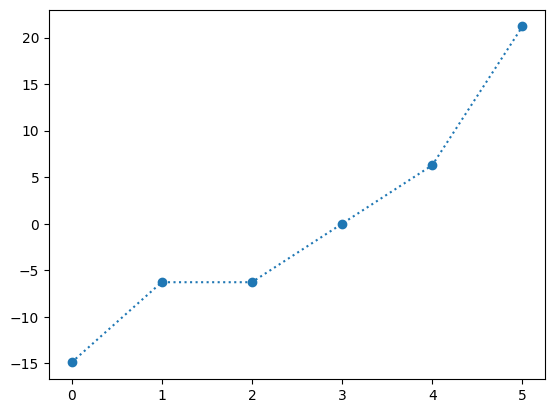

In [16]:
eigenenergies, eigenstates = H.eigenstates()

plt.plot(eigenenergies, linestyle=':', marker='o')
ground_state = eigenstates[0]

In [17]:
# times = np.linspace(0, 1, 101)
times = np.linspace(0, 0.1, 51)

psi0 = eigenstates[0]
# psi0 = np.sqrt(2)*qt.Qobj([1, 1j])
# psi0 = 1/np.sqrt(4)*qt.Qobj([np.sqrt(3), 1])

print(psi0)

result = qt.sesolve(H, psi0, times)

Quantum object: dims=[[6], [1]], shape=(6, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.32131028]
 [ 0.32131028]
 [-0.54177432]
 [-0.54177432]
 [ 0.32131028]
 [ 0.32131028]]


In [18]:
psi0

Quantum object: dims=[[6], [1]], shape=(6, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.32131028]
 [ 0.32131028]
 [-0.54177432]
 [-0.54177432]
 [ 0.32131028]
 [ 0.32131028]]

In [19]:
currents = np.zeros((num_qubits, num_qubits, len(times)), dtype='complex')
       

# current operator is i(a_1^dag*a_2 - a_2^dag*a_1
basis = generate_basis(num_qubits, num_particles)
print(basis)
for i in range(len(times)):
    state_vector = result.states[i].data.to_array()[:,0]
    for j in range(len(basis)):
        left_amp = np.conjugate(state_vector[j])
        left_basis_vector = np.array(basis[j])
        for k in range(len(basis)):
            right_amp = state_vector[k]
            right_basis_vector = np.array(basis[k])
            
            for l in range(len(basis[j])):
                for m in range(len(basis[j])):
#                     print(left_amp*right_amp * current_expectation_value(l, m, left_basis_vector, right_basis_vector))
                    currents[l,m,i] += left_amp*right_amp * current_expectation_value(l, m, left_basis_vector, right_basis_vector)

print(currents)
currents = currents.real

[(1, 1, 0, 0), (1, 0, 1, 0), (1, 0, 0, 1), (0, 1, 1, 0), (0, 1, 0, 1), (0, 0, 1, 1)]


NameError: name 'current_expectation_value' is not defined

In [ ]:
for i in range(currents.shape[0]):
    for j in range(i+1, currents.shape[1]):
        plt.plot(times, currents[i,j,:], label=f'Q{i+1}-Q{j+1}')
    
# plt.ylim(-0.1, 1.1)
    
plt.xlabel('time ($\mu$s)')
plt.ylabel('Currents')
plt.legend()
plt.show()

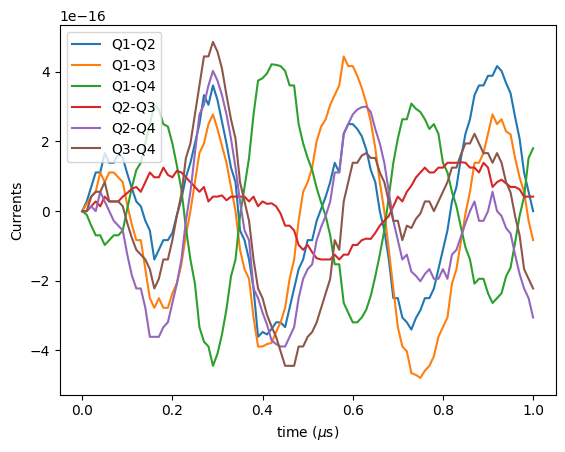

In [22]:
detuning = [2000*2*np.pi]*num_qubits
# detuning = [0]*num_qubits
detuning[0] = 0
detuning[1] = 0
detuning[2] = 1000*2*np.pi
detuning[3] = 1000*2*np.pi
# detuning[3] = 2000*2*np.pi

single_particle_hamiltonian_detuned = generate_triangle_ladder_single_particle_Hamiltonian(num_qubits, J_parallel, J_perp, detuning)

H_detuned = construct_hamiltonian(num_qubits, num_particles, single_particle_hamiltonian_detuned, detuning=detuning, t=1.0)

print(H_detuned)

Quantum object: dims=[[6], [6]], shape=(6, 6), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.00000000e+00 6.28318531e+00 6.28318531e+00 6.28318531e+00
  0.00000000e+00 0.00000000e+00]
 [6.28318531e+00 6.28318531e+03 6.28318531e+00 6.28318531e+00
  0.00000000e+00 0.00000000e+00]
 [6.28318531e+00 6.28318531e+00 6.28318531e+03 0.00000000e+00
  6.28318531e+00 6.28318531e+00]
 [6.28318531e+00 6.28318531e+00 0.00000000e+00 6.28318531e+03
  6.28318531e+00 6.28318531e+00]
 [0.00000000e+00 0.00000000e+00 6.28318531e+00 6.28318531e+00
  6.28318531e+03 6.28318531e+00]
 [0.00000000e+00 0.00000000e+00 6.28318531e+00 6.28318531e+00
  6.28318531e+00 1.25663706e+04]]


In [23]:
print(generate_basis(num_qubits, num_particles))
print(eigenstates[0])

[(1, 1, 0, 0), (1, 0, 1, 0), (1, 0, 0, 1), (0, 1, 1, 0), (0, 1, 0, 1), (0, 0, 1, 1)]
Quantum object: dims=[[6], [1]], shape=(6, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.32131028]
 [ 0.32131028]
 [-0.54177432]
 [-0.54177432]
 [ 0.32131028]
 [ 0.32131028]]


In [42]:
### first evolve to get state at time t

times = np.linspace(0, 0.2, 51)

psi0 = eigenstates[0]
# psi0 = qt.Qobj([0, 0, 1, 0, 0, 0])
# psi0 = qt.Qobj([0, 1])
# psi0 = qt.Qobj([0, 0, 1, 0, 0, 0])
# psi0 = 1/np.sqrt(2)*(qt.Qobj([0, 0, 1, 0, 0, 0]) + 1j*qt.Qobj([0, 0, 0, 0, 1, 0]))

# psi0 = 1/2*(qt.Qobj([1, 0, 0, 0]) + 1j*qt.Qobj([0, 1, 0, 0])) + 1/2*(qt.Qobj([0, 0, 1, 0]) + 1j*qt.Qobj([0, 0, 0, 1]))

# no correlations with 4 - 2 system
psi0 = 1/2*(qt.Qobj([0, 1, 0, 0, 0, 0]) + 1j*qt.Qobj([0, 0, 1, 0, 0, 0]) + 1j*qt.Qobj([0, 0, 0, 1, 0, 0]) - qt.Qobj([0, 0, 0, 0, 1, 0]))
# correlations with 4 - 2 system
positive_current_state = 1/2*(qt.Qobj([0, 1, 0, 0, 0, 0]) + 1j*qt.Qobj([0, 0, 1, 0, 0, 0]) + 1j*qt.Qobj([0, 0, 0, 1, 0, 0]) - qt.Qobj([0, 0, 0, 0, 1, 0]))
negative_current_state = 1/2*(qt.Qobj([0, 1, 0, 0, 0, 0]) - 1j*qt.Qobj([0, 0, 1, 0, 0, 0]) - 1j*qt.Qobj([0, 0, 0, 1, 0, 0]) - qt.Qobj([0, 0, 0, 0, 1, 0]))
counter_current_state = 1/np.sqrt(2)*(positive_current_state + negative_current_state)

psi0 = eigenstates[0]

print(generate_basis(num_qubits, num_particles))

print(psi0)

# data = psi0.data.to_array()
# pop_sum = 0
# for i in range(10):
#     pop_sum += np.power(np.abs(data[i,0]),2)
# print(pop_sum)

e_ops = []
for i in range(num_states):
    number_operator = np.zeros((num_states,num_states))
    number_operator[i,i] = 1
    e_ops.append(qt.Qobj(number_operator))
    
result = qt.sesolve(H_detuned, psi0, times)

[(1, 1, 0, 0), (1, 0, 1, 0), (1, 0, 0, 1), (0, 1, 1, 0), (0, 1, 0, 1), (0, 0, 1, 1)]
Quantum object: dims=[[6], [1]], shape=(6, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.32131028]
 [ 0.32131028]
 [-0.54177432]
 [-0.54177432]
 [ 0.32131028]
 [ 0.32131028]]


In [43]:
populations = np.zeros((num_qubits, len(times)))

basis = generate_basis(num_qubits, num_particles)
print(basis)
for i in range(len(times)):
    state_vector = result.states[i].data.to_array()[:,0]
    for j in range(len(basis)):
        amp = state_vector[j]
        for k in range(len(basis[j])):
            if basis[j][k] == 1:
                populations[k,i] += np.power(np.abs(amp), 2)

[(1, 1, 0, 0), (1, 0, 1, 0), (1, 0, 0, 1), (0, 1, 1, 0), (0, 1, 0, 1), (0, 0, 1, 1)]


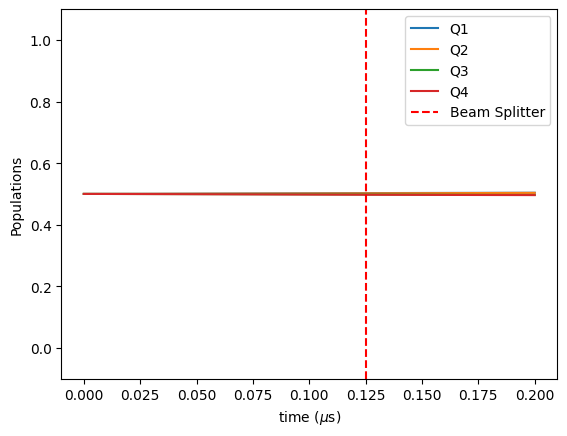

In [44]:
for i in range(populations.shape[0]):
    plt.plot(times, populations[i,:], label=f'Q{i+1}')
    
    
    
coupling = J_perp
beam_splitter_time = np.pi/(4*np.abs(coupling))

beam_splitter_index = np.round(np.argmin(np.abs(times - beam_splitter_time)))

plt.axvline(x=beam_splitter_time, color='r', linestyle='--', label='Beam Splitter')

    
plt.ylim(-0.1, 1.1)
    
plt.xlabel('time ($\mu$s)')
plt.ylabel('Populations')
plt.legend()
plt.show()

In [45]:
def current_expectation_value(i, j, left_basis_vector, right_basis_vector):
    value = 0

    right_basis_vector_copy = np.copy(right_basis_vector)
    right_basis_vector_copy[j] -= 1
    if all(right_basis_vector_copy >= 0) and all(right_basis_vector_copy <= 1):
        right_basis_vector_copy[i] += 1
        if all(right_basis_vector_copy >= 0) and all(right_basis_vector_copy <= 1):
            if np.array_equal(right_basis_vector_copy, left_basis_vector):
                value += 1j
                
    
    right_basis_vector_copy = np.copy(right_basis_vector)
    right_basis_vector_copy[i] -= 1
    if all(right_basis_vector_copy >= 0) and all(right_basis_vector_copy <= 1):
        right_basis_vector_copy[j] += 1
        if all(right_basis_vector_copy >= 0) and all(right_basis_vector_copy <= 1):
            if np.array_equal(right_basis_vector_copy, left_basis_vector):
                value -= 1j
            
    return value
    

In [46]:
left_basis_vector = np.array([1, 0, 1, 0])
right_basis_vector = np.array([0, 1, 1, 0])

print(current_expectation_value(0, 1, left_basis_vector, right_basis_vector))

1j


In [47]:
# print(result.states)

for i in range(len(result.states)):
    if i > 100:
        print(result.states[i].data.to_array())
    
#     for a in zip(result.states[i]):
#         print(a)
#     print()


In [48]:
### try to mesaure correlations




qubit_number_operators = np.zeros((num_qubits, num_states, num_states))
print(qubit_number_operators.shape)

basis = generate_basis(num_qubits, num_particles)
for i in range(num_qubits):
    for j in range(len(basis)):
        basis_vector = basis[j]
        if basis_vector[i] == 1:
            qubit_number_operators[i,j,j] += 1
            
qubit_difference_operators = np.zeros((num_qubits, num_qubits, num_states, num_states))

for i in range(num_qubits):
    for j in range(num_qubits):
        qubit_difference_operators[i,j,:,:] = qubit_number_operators[i,:,:] - qubit_number_operators[j,:,:]

print(basis)
print(qubit_difference_operators[0,1,:,:])

                

(4, 6, 6)
[(1, 1, 0, 0), (1, 0, 1, 0), (1, 0, 0, 1), (0, 1, 1, 0), (0, 1, 0, 1), (0, 0, 1, 1)]
[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.]]


In [49]:
Q1_Q2_difference = qubit_difference_operators[0,1,:,:]
Q3_Q4_difference = qubit_difference_operators[2,3,:,:]

Q2_Q3_difference = qubit_difference_operators[1,2,:,:]


Q1_Q3_difference = qubit_difference_operators[0,2,:,:]
Q2_Q4_difference = qubit_difference_operators[1,3,:,:]


Q1_Q2_difference_eigenvalues, Q1_Q2_difference_eigenvectors = np.linalg.eig(Q1_Q2_difference)


print(Q1_Q2_difference)
print(Q3_Q4_difference)
# print(Q1_Q2_difference_eigenvalues)
# print(Q1_Q2_difference_eigenvectors)

[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.]]


In [50]:
beam_splitter_state = result.states[beam_splitter_index]
beam_splitter_vector = beam_splitter_state.data.to_array()[:,0]


In [51]:
initial_state = psi0.data.to_array()
print('initial_state')
print(initial_state)

print('beam splitter state')
print(beam_splitter_vector)

initial_state
[[ 0.32131028+0.j]
 [ 0.32131028+0.j]
 [-0.54177432+0.j]
 [-0.54177432+0.j]
 [ 0.32131028+0.j]
 [ 0.32131028+0.j]]
beam splitter state
[ 0.3226662 +0.00065105j  0.00401272+0.54300364j -0.00683713-0.32181732j
 -0.00683713-0.32181732j  0.00410725+0.5422383j   0.31582416-0.0025744j ]


In [52]:
def create_number_operator(num_qubits):
    one_qubit_projective = np.array([[0, 0], [0, 1]])
    
    number_operators = [np.identity(2) for i in range(num_qubits)]
    number_operators[0] = one_qubit_projective
    
    for i in range(1, num_qubits):
        for j in range(num_qubits):
            if i == j:
                number_operators[j] = np.kron(number_operators[j], one_qubit_projective)
            else:
                number_operators[j] = np.kron(number_operators[j], np.identity(2))
                
    return np.array(number_operators)
        

In [53]:
def convert_bitstring_to_state(bitstring):
    num_qubits = len(bitstring)
    
    zero_state = np.array([1, 0])
    one_state = np.array([0, 1])
    
    if int(bitstring[0]) == 0:
        state = zero_state
    elif int(bitstring[0]) == 1:
        state = one_state
        
    for i in range(1, len(bitstring)):
        if int(bitstring[i]) == 0:
            state = np.kron(state, zero_state)
        if int(bitstring[i]) == 1:
            state = np.kron(state, one_state)
            
    return state

In [54]:
def generate_bitstrings(N, M):
    """
    Generate all bitstrings of length N with exactly M ones.
    
    Parameters:
    N (int): Length of the bitstrings.
    M (int): Number of ones in each bitstring.
    
    Returns:
    List[str]: List of bitstrings as strings.
    """
    bitstrings = []
    for ones_positions in combinations(range(N), M):
        bitstring = ['0'] * N
        for pos in ones_positions:
            bitstring[pos] = '1'
        bitstrings.append(''.join(bitstring))
    
    return np.array(bitstrings)

In [55]:
def find_basis_index(basis, bitstring):
    for i in range(len(basis)):
        state = basis[i]
        
        if tuple([int(bit) for bit in bitstring]) == state:
            return i
    return None

In [56]:
one_qubit_projective = np.array([[0, 0], [0, 1]])

all_m_particle_bitstrings = generate_bitstrings(num_qubits, num_particles)
print(all_m_particle_bitstrings)


number_operators = create_number_operator((num_qubits))

reduced_number_operators = np.zeros((num_qubits, num_states, num_states))

basis = generate_basis(num_qubits, num_particles)
for i in range(len(all_m_particle_bitstrings)):
    bitstring = all_m_particle_bitstrings[i]
    bitstring_state = convert_bitstring_to_state(bitstring)
    basis_index = find_basis_index(basis, bitstring)
    
    for j in range(num_qubits):
        matrix_element = np.conjugate(bitstring_state) @ number_operators[j,:,:] @ bitstring_state
        reduced_number_operators[j, basis_index, basis_index] = matrix_element

print(number_operators[0,:,:])

reduced_difference_operators = np.zeros((num_qubits, num_qubits, num_states, num_states))

for i in range(num_qubits):
    for j in range(num_qubits):
        reduced_difference_operators[i,j,:,:] = reduced_number_operators[i,:,:] - reduced_number_operators[j,:,:]

print(reduced_difference_operators[1,0,:,:])
print(reduced_difference_operators[2,3,:,:])

['1100' '1010' '1001' '0110' '0101' '0011']
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[[ 0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0

In [57]:
print(Q1_Q2_difference)
print(Q3_Q4_difference)

[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.]]


In [58]:
current_expectation_Q1_Q2 = (np.conjugate(beam_splitter_vector) @ Q1_Q2_difference @ beam_splitter_vector).real
current_expectation_Q3_Q4 = (np.conjugate(beam_splitter_vector) @ Q3_Q4_difference @ beam_splitter_vector).real

current_correlation_Q1_Q2_Q3_Q4 = (np.conjugate(beam_splitter_vector) @ Q1_Q2_difference @ Q3_Q4_difference @ beam_splitter_vector).real

print(current_expectation_Q1_Q2)
print(current_expectation_Q3_Q4)
print(current_correlation_Q1_Q2_Q3_Q4)

0.0008298079369352894
0.0008298079369365288
0.3816820290358338


In [59]:
current_expectation_Q1_Q3 = (np.conjugate(beam_splitter_vector) @ Q1_Q3_difference @ beam_splitter_vector).real
current_expectation_Q2_Q4 = (np.conjugate(beam_splitter_vector) @ Q2_Q4_difference @ beam_splitter_vector).real

current_correlation_Q1_Q3_Q2_Q4 = (np.conjugate(beam_splitter_vector) @ Q1_Q3_difference @ Q2_Q4_difference @ beam_splitter_vector).real

print(current_expectation_Q1_Q3)
print(current_expectation_Q2_Q4)
print(current_correlation_Q1_Q3_Q2_Q4)

0.0043623688887585565
0.004362368888759778
-0.0033608457757730303


In [ ]:
current_expectation_Q1_Q2 = (np.conjugate(beam_splitter_vector) @ Q1_Q2_difference @ beam_splitter_vector).real
current_expectation_Q2_Q3 = (np.conjugate(beam_splitter_vector) @ Q2_Q3_difference @ beam_splitter_vector).real

current_correlation_Q1_Q2_Q2_Q3 = (np.conjugate(beam_splitter_vector) @ Q1_Q2_difference @ Q2_Q3_difference @ beam_splitter_vector).real

print(current_expectation_Q1_Q2)
print(current_expectation_Q2_Q3)
print(current_correlation_Q1_Q2_Q2_Q3)

### 3.2 Visualization

In [ ]:
%matplotlib notebook

num_steps = len(times)  # total number of timesteps (example)
timestep_index = 0  # starting time index

basis = generate_basis(N, M)
dim = len(basis)
print("Basis states (index: state):")
for idx, state in enumerate(basis):
    print(idx, state)
    
state_vectors = result.states

# --- Qubit positions ---
# For a simple grid, we can define fixed positions for each qubit.
# Here, we place them on a 2x2 grid for N=4.
positions = {
    0: (0, 0),
    1: (1, 0),
    2: (0, 1),
    3: (1, 1)
}
# For a different N, you can define positions accordingly.

# --- Visualization Functions ---
def compute_qubit_contributions(state_vector, basis):
    """
    Given a state vector (length dim) and the many-body basis,
    compute a dictionary mapping each qubit to the sum of amplitudes
    from basis states where that qubit is occupied.
    """
    contributions = {i: 0+0j for i in range(N)}
    for amp, state in zip(state_vector, basis):
        for qubit, occ in enumerate(state):
            if occ == 1:
                contributions[qubit] += amp
    return contributions

def phase_to_color(z, cmap=plt.cm.hsv):
    """
    Map a complex number z to a color.
    - The phase of z (from -pi to pi) is mapped cyclically to a hue.
    - The magnitude of z is used as brightness (after normalization).
    """
    phase = np.angle(z)  # in radians, range [-pi, pi]
    # Map phase to [0,1]
    hue = (phase + np.pi) / (2*np.pi)
    # Use magnitude for brightness; here we clip at 1 for visualization
    brightness = min(abs(z), 1.0)
    base_color = np.array(cmap(hue))
    # Adjust brightness by scaling RGB components (ignore alpha)
    color = brightness * base_color[:3]
    return np.clip(color, 0, 1)

# --- Plot Setup ---
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)
ax.set_aspect('equal')
ax.axis('off')

# Create a circle patch for each qubit.
circles = {}
radius = 0.15
for qubit, (x, y) in positions.items():
    circle = Circle((x, y), radius, color='white', ec='black', lw=2)
    ax.add_patch(circle)
    circles[qubit] = circle

title = ax.text(0.5, 1.45, '', ha='center', transform=ax.transAxes, fontsize=12)

# --- Update Function ---
def update_plot(time_idx):
    title.set_text(f"Time step: {time_idx}")
    state_vector = state_vectors[time_idx]
    contributions = compute_qubit_contributions(state_vector, basis)
    for qubit, circle in circles.items():
        comp = contributions[qubit]
        # Map complex number to color:
        color = phase_to_color(comp)
        
#         print(f"Qubit {qubit}: Contribution {comp}, Color {color}")  # Debugging
        
        circle.set_facecolor(color)

    
# Initial update:
update_plot(0)
plt.show()


# --- Interactive Slider ---
slider = widgets.IntSlider(min=0, max=num_steps-1, step=1, value=0, description='Time')

def on_slider_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        update_plot(change['new'])

slider.observe(on_slider_change)
display(slider)




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import asyncio  # For non-blocking animation control
from IPython.display import display
from matplotlib.patches import Circle

# Enable interactive mode
%matplotlib notebook  

num_steps = len(times)  # Total number of timesteps
timestep_index = 0  # Starting time index

basis = generate_basis(N, M)
dim = len(basis)
print("Basis states (index: state):")
for idx, state in enumerate(basis):
    print(idx, state)

state_vectors = result.states

# --- Qubit positions ---
positions = {
    0: (0, 0),
    1: (1, 0),
    2: (0, 1),
    3: (1, 1)
}

# --- Visualization Functions ---
def compute_qubit_contributions(state_vector, basis):
    contributions = {i: 0+0j for i in range(N)}
    for amp, state in zip(state_vector, basis):
        for qubit, occ in enumerate(state):
            if occ == 1:
                contributions[qubit] += amp
    return contributions

def phase_to_color(z, cmap=plt.cm.hsv):
    phase = np.angle(z)
    hue = (phase + np.pi) / (2*np.pi)
    brightness = min(abs(z), 1.0)
    base_color = np.array(cmap(hue))
    color = brightness * base_color[:3]
    return np.clip(color, 0, 1)

# --- Plot Setup ---
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)
ax.set_aspect('equal')
ax.axis('off')

# Create a circle patch for each qubit.
circles = {}
radius = 0.15
for qubit, (x, y) in positions.items():
    circle = Circle((x, y), radius, color='white', ec='black', lw=2)
    ax.add_patch(circle)
    circles[qubit] = circle

title = ax.text(0.5, 1.45, '', ha='center', transform=ax.transAxes, fontsize=12)

# --- Update Function ---
def update_plot(time_idx):
    title.set_text(f"Time step: {time_idx}")
    state_vector = state_vectors[time_idx]
    contributions = compute_qubit_contributions(state_vector, basis)
    
    for qubit, circle in circles.items():
        color = phase_to_color(contributions[qubit])
        circle.set_facecolor(color)
    
    fig.canvas.draw_idle()

# Initial update:
update_plot(0)
plt.show()

# --- Interactive Controls ---
slider = widgets.IntSlider(min=0, max=num_steps-1, step=1, value=0, description='Time')
play_button = widgets.Button(description="Play ▶")
stop_button = widgets.Button(description="Stop ⏹")

# --- Play Animation Function ---
playing = False  # Animation control flag

async def play_animation():
    global playing
    playing = True
    for t in range(slider.value, num_steps):
        if not playing:
            break
        slider.value = t  # Move slider, triggering update
        await asyncio.sleep(0.1)  # Non-blocking wait

def stop_animation(b):
    global playing
    playing = False

# Bind buttons to functions
play_button.on_click(lambda b: asyncio.ensure_future(play_animation()))
stop_button.on_click(stop_animation)

# --- Link Slider to Update Function ---
def on_slider_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        update_plot(change['new'])

slider.observe(on_slider_change)

# --- Display Controls ---
display(slider, play_button, stop_button)


### 3.3. Reduced Density Matrix Simulation

In [103]:
print(generate_basis(num_qubits, num_particles))

[(1, 1, 0, 0), (1, 0, 1, 0), (1, 0, 0, 1), (0, 1, 1, 0), (0, 1, 0, 1), (0, 0, 1, 1)]


In [224]:
def exclude_indices(array, indices_to_exclude):
    return tuple(array[i] for i in range(len(array)) if i not in indices_to_exclude)

def calculate_two_qubit_reduced_density_matrix(num_qubits, num_particles, state, qubit_1_index, qubit_2_index):
    state_vector = state.data.to_array()
    state_excluded = exclude_indices(state_vector, [qubit_1_index, qubit_2_index])
    
    
    density_matrix = np.outer(np.conjugate(state_vector), state_vector)
    
    trace_basis = [bits for bits in product((0, 1), repeat=num_qubits-2)]
    two_qubit_basis = [bits for bits in product((0, 1), repeat=2)]
    
    basis = generate_basis(num_qubits, num_particles)
    
    reduced_density_matrix = np.zeros((4, 4), dtype='complex')
    
    for i in range(len(trace_basis)):
        # iterate over basis of remaining qubits to compute trace
        trace_basis_state = trace_basis[i]
        for j in range(len(basis)):
            # iterate over basis states in left state of outer product
            left_basis_state = basis[j]
            left_basis_state_excluded = exclude_indices(left_basis_state, [qubit_1_index, qubit_2_index])
            
            # basis state in two qubit basis
            left_basis_reduced_index = two_qubit_basis.index((left_basis_state[qubit_1_index], left_basis_state[qubit_2_index]))
            
            for k in range(len(basis)):
                # iterate over basis states in right state of outer product
                right_basis_state = basis[k]
                right_basis_state_excluded = exclude_indices(right_basis_state, [qubit_1_index, qubit_2_index])
            
                # basis state in two qubit basis
                right_basis_reduced_index = two_qubit_basis.index((right_basis_state[qubit_1_index], right_basis_state[qubit_2_index]))
            
                if trace_basis_state == left_basis_state_excluded and trace_basis_state == right_basis_state_excluded:
                    reduced_density_matrix[left_basis_reduced_index, right_basis_reduced_index] += density_matrix[left_basis_reduced_index, right_basis_reduced_index]
            
            
    return reduced_density_matrix

In [225]:
def convert_reduced_to_full_state(num_qubits, num_particles, reduced_state):
    '''
    convert an N qubit state in the M particle to an N qubit state in 2^N space
    '''
    
    reduced_state_vector = reduced_state.data.to_array()
    
    reduced_basis = generate_basis(num_qubits, num_particles)
    full_basis = [bits for bits in product((0, 1), repeat=num_qubits)]
    
    full_state = np.zeros(2**num_qubits, dtype='complex')
    
    for i in range(len(reduced_basis)):
        reduced_basis_state = reduced_basis[i]
        
        full_basis_index = full_basis.index(reduced_basis_state)
        
        full_state[full_basis_index] = reduced_state[i]
    
    return qt.Qobj(full_state)

In [226]:
state_vector = psi0.data.to_array()
# state_vector = beam_splitter_state.data.to_array()

rho = np.outer(np.conjugate(state_vector), state_vector)
print(np.round(rho, 2))
print(np.trace(rho))

[[ 0.1 +0.j  0.1 +0.j -0.17+0.j -0.17+0.j  0.1 +0.j  0.1 +0.j]
 [ 0.1 +0.j  0.1 +0.j -0.17+0.j -0.17+0.j  0.1 +0.j  0.1 +0.j]
 [-0.17-0.j -0.17-0.j  0.29+0.j  0.29+0.j -0.17-0.j -0.17-0.j]
 [-0.17-0.j -0.17-0.j  0.29+0.j  0.29+0.j -0.17-0.j -0.17-0.j]
 [ 0.1 +0.j  0.1 +0.j -0.17+0.j -0.17+0.j  0.1 +0.j  0.1 +0.j]
 [ 0.1 +0.j  0.1 +0.j -0.17+0.j -0.17+0.j  0.1 +0.j  0.1 +0.j]]
(1+0j)


In [227]:
sub_qubit_1 = 0
sub_qubit_2 = 1

rho = calculate_two_qubit_reduced_density_matrix(num_qubits, num_particles, psi0, 0, 1)
print(rho)
print(np.trace(rho))

[[ 0.10324029+0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.20648059+0.j -0.34815531+0.j  0.        +0.j]
 [ 0.        +0.j -0.34815531+0.j  0.58703883+0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j  0.29351941+0.j]]
(1.1902791209833867+0j)


In [216]:
product_state = qt.basis([2, 2, 2, 2], [0, 1, 0, 1])
product_state * product_state.dag()

Quantum object: dims=[[2, 2, 2, 2], [2, 2, 2, 2]], shape=(16, 16), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

In [188]:
full_psi0 = convert_reduced_to_full_state(num_qubits, num_particles, psi0)

In [218]:
rho = full_psi0 * full_psi0.dag()
rho = qt.Qobj(rho.data.to_array(), dims=[[2]*num_qubits]*2)
rho

Quantum object: dims=[[2, 2, 2, 2], [2, 2, 2, 2]], shape=(16, 16), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.10324029  0.          0.10324029
  -0.17407766  0.          0.         -0.17407766  0.10324029  0.
   0.10324029  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.      

In [223]:
reduced_rho = rho.ptrace([0,1])
reduced_rho

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.10324029  0.          0.          0.        ]
 [ 0.          0.39675971 -0.34815531  0.        ]
 [ 0.         -0.34815531  0.39675971  0.        ]
 [ 0.          0.          0.          0.10324029]]

In [260]:
num_qubits = 4
num_particles = 2

num_states = math.comb(num_qubits, num_particles)

J_parallel = 1 * 2 *np.pi
J_perp = 1 * 2 *np.pi

num_levels = 2
a = qt.destroy(num_levels)

annihilation_operators = [qt.tensor(a, qt.qeye(num_levels)), qt.tensor(qt.qeye(num_levels), a)]

coupling = J_perp
H_two_qubit = coupling*(annihilation_operators[0].dag()*annihilation_operators[1] + annihilation_operators[1].dag()*annihilation_operators[0])

t_bs = np.pi/(4*coupling)
U_bs= (-1j*H_two_qubit*t_bs).expm()

print(H_two_qubit/2/np.pi)
print(U_bs)

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dia, isherm=True
Qobj data =
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[1.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.70710678+0.j         0.        -0.70710678j
  0.        +0.j        ]
 [0.        +0.j         0.        -0.70710678j 0.70710678+0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.        +0.j
  1.        +0.j        ]]


In [266]:
U_bs

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[1.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.70710678+0.j         0.        -0.70710678j
  0.        +0.j        ]
 [0.        +0.j         0.        -0.70710678j 0.70710678+0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.        +0.j
  1.        +0.j        ]]

In [277]:
U_bs*qt.Qobj([0, 1, 0, 0], dims=[[2, 2], [1, 1]])*qt.Qobj([0, 1, 0, 0], dims=[[2, 2], [1, 1]]).dag()*U_bs.dag()

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0. +0.j  0. +0.j  0. +0.j  0. +0.j ]
 [0. +0.j  0.5+0.j  0. +0.5j 0. +0.j ]
 [0. +0.j  0. -0.5j 0.5+0.j  0. +0.j ]
 [0. +0.j  0. +0.j  0. +0.j  0. +0.j ]]

In [287]:
times = np.linspace(0, 0.2, 51)

rho0 = reduced_rho

# rho0 = qt.Qobj([[0, 0, 0, 0],
#                 [0, 0.5, 0, 0],
#                 [0, 0, 0.5, 0],
#                 [0, 0, 0, 0]], dims=[[2, 2], [2,2]])
print(rho0)
    
result = qt.mesolve(H_two_qubit, rho0, times)

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.10324029  0.          0.          0.        ]
 [ 0.          0.39675971 -0.34815531  0.        ]
 [ 0.         -0.34815531  0.39675971  0.        ]
 [ 0.          0.          0.          0.10324029]]


In [288]:
result.states[beam_splitter_index]

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.10324029  0.          0.          0.        ]
 [ 0.          0.39675971 -0.34815531  0.        ]
 [ 0.         -0.34815531  0.39675971  0.        ]
 [ 0.          0.          0.          0.10324029]]

In [289]:
U_bs*rho0*U_bs.dag()

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.10324029  0.          0.          0.        ]
 [ 0.          0.39675971 -0.34815531  0.        ]
 [ 0.         -0.34815531  0.39675971  0.        ]
 [ 0.          0.          0.          0.10324029]]

In [293]:
n1_n2_difference_operator = qt.Qobj([[0, 0, 0, 0],
                                     [0, -1, 0, 0],
                                     [0, 0, 1, 0],
                                     [0, 0, 0, 0]], dims=[[2,2],[2,2]]) 

n1_n2_difference_operator

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  0.]]

In [294]:
U_bs * n1_n2_difference_operator * U_bs.dag()

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j -2.22044605e-16+0.j  0.00000000e+00-1.j
   0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+1.j  3.33066907e-16+0.j
   0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j]]

In [296]:
j_12_operator = 1j*(annihilation_operators[0].dag()*annihilation_operators[1] - annihilation_operators[1].dag()*annihilation_operators[0])
j_12_operator

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dia, isherm=True
Qobj data =
[[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -0.-1.j  0.+0.j]
 [ 0.+0.j  0.+1.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]]

In [301]:
(j_12_operator*rho0).tr()

0j